# Experiments & Testing 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

                       Start
                         |
                         v
                Formulate Hypothesises
                         |
                         v
      Formulate analysis plan and Design Experiment 
                         |
                         v
                    Analyze data 
                         |
                         v
                 Interpret Results 
                         |
                         v
                        End 

## A/B test

**Treatment** activity in which drug, price, etc. exposed to a subject.

**Subjects** participants in treatment.

**Treatment Group** group of subjects exposed to treatment. 

**Control Group** group of subjects not exposed to treatment.

**Randomization** randomly selecting subjects to put in groups.

**test statistics** the metric used to measure the effect of the treatment.

In A/B test an experiment is established, two groups for a treatment, one group will follow up on existing/standard treatment or no treatment called **Control group**, and the other one will follow up on new treatment called **Treatment Group**

Generally the difference between the groups

* The effect of the different treatments.
* because of randomness, by luck subjects are assigned to which group for results to perform better.(or better performing subjects concentrated in A or B)

So now what *test statistics* or metrics to compare groups A or B. Most common is binary.(buy or not-buy, click or not-clicked, fraud or no-fraud)

I am gonna take a very non-medical example to understand this. So there are two advertisements(types of ads) on a website and we are trying to test with group of people, randomly 90 people selected for ad A and randomly 90 people selected for ad B , whether they will click or not click on the ad.

so we have this kind of metrics as result of the experiment.
    
                 |   
        Outcome  |   Advert A     Advert B
        _________|__________________________
        click    |
                 |
        no-click |
        

In [2]:
actions = np.array(['no-click','click'])

In [3]:
np.random.seed(0)

group_A = np.random.choice(actions,size=90, p=[0.4,0.6]) # have to give some bias to generate some sided choices
group_B = np.random.choice(actions,size=90, p=[0.2,0.8])

df = pd.DataFrame()
df['Advert A'] = group_A
df['Advert B'] = group_B

df.head()

,Advert A,Advert B
0,click,click
1,click,click
2,click,no-click
3,click,click
4,click,click


In [4]:
result_df = pd.DataFrame()

result_df['Advert A'] = df['Advert A'].value_counts()
result_df['Advert B'] = df['Advert B'].value_counts()

result_df

,Advert A,Advert B
click,55,73
no-click,35,17


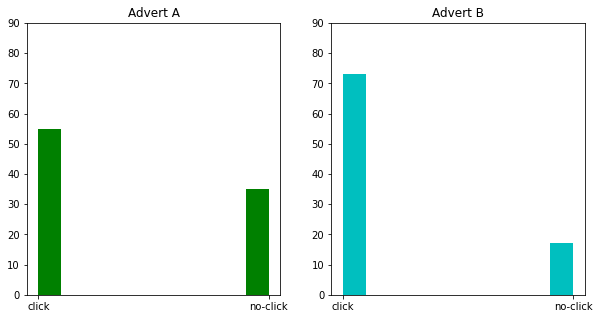

In [5]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].hist(df['Advert A'],color='g')
ax[0].set_title('Advert A')
ax[0].set_ylim((0,90))

ax[1].hist(df['Advert B'],color='c')
ax[1].set_title('Advert B')
ax[1].set_ylim((0,90))

plt.show()

`normally as a data scientist the question I have in my mind while using A/B testing that
which ad performed better?` 

## Hypothesis Test/ Significance Test

**The purpose is to learn whether random chance might be responsible for an observed effect**

### Null Hypothesis ($H_0$)

- The hypothesis that chance is to blame.
- To check whether claim is applicable or not 
- States that there is no significant difference between a set of a variable 
- in simple words everything is same or equal


By why do we need this? So lets say for A/B tseting we have randomly selected people for control and treatment group. After introducing randomness in the experiment it is okay to assume that any similarity in the groups is completely by chance. But to idenitify this similarity between groups we need a baseline assumption that there is a similarity/ equivalency to be measured. This baseline assumption is Null hypothesis(eg. both of the groups have equal mean height.$\mu_1 = \mu_2$). And to clarify that there is no similarity Null Hypothesis has to be rejected with test statisitcs.

### Alternate Hypothesis ($H_1$ / $H_a$)
- to challenge currently accepted state of knowledge
- more precisely states that there is a significant difference between a set of a variable
- counterpoint to the null hypothesis.


`Null Hypothesis and Alternate Hypothesis are mutually exclusive`

###  Steps for Hypothesis Testing  
- Define Hypothesis H0,Ha
- Select test statistics whose probability distribution function can be found under the Null Hypothesis
- Collect data 
- Compute test statistics and calculate p-value under null hypothesis
- Reject Null Hyppthsis if p-value is lower then predetermined significance value

## Types of tests

| Type of test | Description |
|-|-|
| One tailed/ One way | Region of rejection is only on one side of sampling distribution |
| Two tailed/ Two way | Region of rejection is on both sides of sampling distribution |

## Resampling

Repeatedly sampling values from the observed data, with a general goal of assessing random variability in a statistic. It is used to improve machine learning models accuracy.

There are two types of resampling processes
1. bootstrap
1. permutation tests

### Permutation Tests

**permute** => to change the order of a set of values.

The first step in a permutation test of the hypothesis is to combine the results from groups A and B. 
This is an idea of the null hypthosis that the treatments to which the groups were exposed do not differ. Then we draw up resample groups from the combined set and do the tests, and then see how much they differ.

> Permutation test include without replacement resampling

#### Process
1. Combine the results from the different groups
1. Shuffle, then random draw without replacement resample of the same size a group A.
1. From remaining data, randomly draw without replacement resample of the same size a group B.
1. Do the same for rest if the groups involved in initial combination.
1. Calculate the same statistic calculated for original sample, calculate it for new samples, record it. here we have completed one permutation iteration.
1. Repeat above steps R times, to yield a permutation distribution.


- Now we have 2 types of entities
    - observed difference
    - permutation differences


- 2 scenarios
    - observed differences are within the set of permutation differences. then conclusion is observed difference is within the range what chance(permutation) would produce.
    - observed differences are outside most of the permutation differences then we conclude that random chance is not possible and difference is statistically significant.
    
This **statistically significant** term comes around very often, so what does it represents as mean of these words are very simple to interpret.

In [88]:
np.random.seed(0)

A_size = 15
B_size = 21
total_size = A_size + B_size
A = np.random.randint(low=10, high=300, size=(A_size,))
B = np.random.randint(low=15, high=300, size=(B_size,))

A, B

(array([182,  57, 127, 202, 261, 205,  19, 221, 287, 252,  97,  80,  98,
        203,  49]),
 array([102, 189, 103, 180,  40,  87, 280, 130, 258, 212, 114, 192, 258,
        162, 162, 280, 200, 142,  47,  46, 217]))

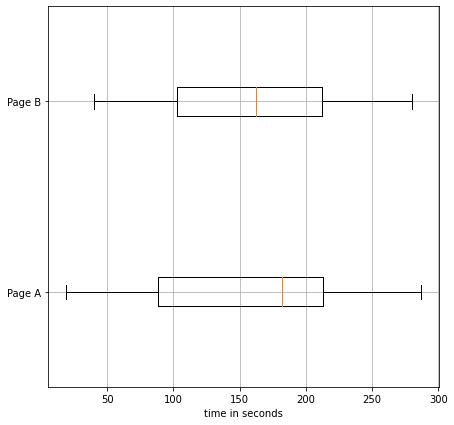

In [89]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.boxplot(
    x=[A,B], 
    vert=False, 
    labels=['Page A','Page B']
)
ax.set_xlabel("time in seconds")
ax.grid()
plt.show()

In [161]:
B.mean() - A.mean()

5.952380952380963

In [156]:
combines = np.hstack((A,B))
combines

array([182,  57, 127, 202, 261, 205,  19, 221, 287, 252,  97,  80,  98,
       203,  49, 102, 189, 103, 180,  40,  87, 280, 130, 258, 212, 114,
       192, 258, 162, 162, 280, 200, 142,  47,  46, 217])

In [172]:
statistics = []
R = 1000
for i in range(R):
    A_resample = np.random.choice(combines,size=A_size,replace=False)
    B_resample = np.array([i for i in combines if i not in A_resample])

    statistics.append(B_resample.mean() - A_resample.mean())

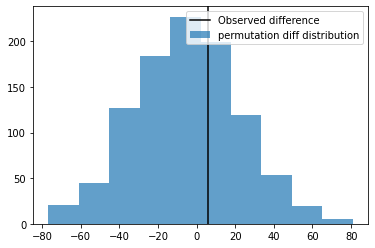

In [185]:
fig, ax = plt.subplots(1,1)
ax.axvline(B.mean() - A.mean(), color='k', label='Observed difference')
ax.hist(statistics,alpha=0.7, label='permutation diff distribution')

ax.legend()
plt.show()

So the Observed Difference is within the range of chance variations, thus is **`not statistically significant`**.

### Bootstrap

Resampling with relacement.

#### Process
1. Combine the results from the different groups
1. Shuffle, then random draw with replacement resample of the same size a group A.
1. From remaining data, randomly draw with replacement resample of the same size a group B.
1. Do the same for rest if the groups involved in initial combination.
1. Calculate the same statistic calculated for original sample, calculate it for new samples, record it. here we have completed one permutation iteration.
1. Repeat above steps R times, to yield a permutation distribution.


In [186]:
np.random.seed(0)

A_size = 15
B_size = 21
total_size = A_size + B_size
A = np.random.randint(low=10, high=300, size=(A_size,))
B = np.random.randint(low=15, high=300, size=(B_size,))

A, B

(array([182,  57, 127, 202, 261, 205,  19, 221, 287, 252,  97,  80,  98,
        203,  49]),
 array([102, 189, 103, 180,  40,  87, 280, 130, 258, 212, 114, 192, 258,
        162, 162, 280, 200, 142,  47,  46, 217]))

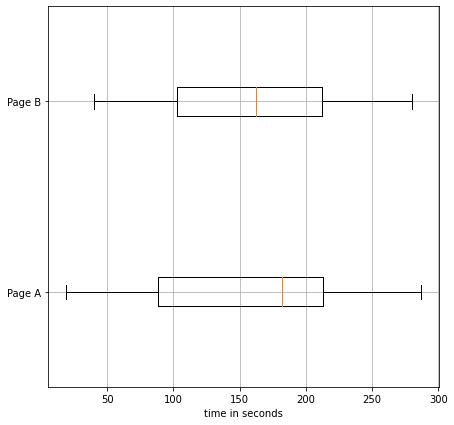

In [187]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.boxplot(
    x=[A,B], 
    vert=False, 
    labels=['Page A','Page B']
)
ax.set_xlabel("time in seconds")
ax.grid()
plt.show()

In [188]:
B.mean() - A.mean()

5.952380952380963

In [189]:
combines = np.hstack((A,B))
combines

array([182,  57, 127, 202, 261, 205,  19, 221, 287, 252,  97,  80,  98,
       203,  49, 102, 189, 103, 180,  40,  87, 280, 130, 258, 212, 114,
       192, 258, 162, 162, 280, 200, 142,  47,  46, 217])

In [190]:
statistics = []
R = 1000
for i in range(R):
    A_resample = np.random.choice(combines,size=A_size,replace=True)
    B_resample = np.random.choice(combines,size=B_size,replace=True)

    statistics.append(B_resample.mean() - A_resample.mean())

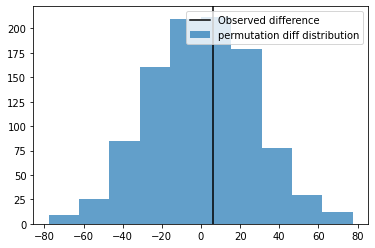

In [191]:
fig, ax = plt.subplots(1,1)
ax.axvline(B.mean() - A.mean(), color='k', label='Observed difference')
ax.hist(statistics,alpha=0.7, label='permutation diff distribution')

ax.legend()
plt.show()

So the Observed Difference is within the range of chance variations, thus is **`not statistically significant`**.

## Statisitcal Significance

This is the point where we'll understanding this topic.
Statisitians needs to measure results of an experiment, for that it is required to check whether results of the experiments are more extreme than a random chance might provide. If the result is outside the limits of chance variation then it is said to be `statisitcally significant`

### Decision rules 
- p-value
- region of acceptance 

### P Value

- measure of test statistics significance for that `null hypothesis` is true.
- like p-value is the probability of observing another mean value that is at least as extreme as the value found from the sample data.(still not clear to me)
- this should mean a test is done for proof of hypothesis, results are observed that if p_value is greater than the significance level( similar observations) then Null Hypothesis is accepted else rejected (not similar observations).


| The P-value interpretation table ||
|-|-|
| Less than 0.01 | strong evidence against Null Hypothesis, very statistically significant |
| 0.01 to 0.05 | Some evidence against Null Hypothesis, statistically significant | 
| Greater than 0.05 | Insufficient evidence against Null Hypothesis | 


In [2]:
from scipy import stats

/home/nishant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


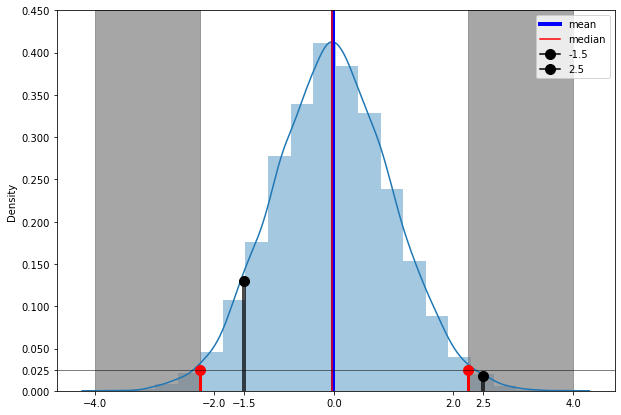

In [13]:
np.random.seed(0)

mu = 0
sigma = 1
number_of_records = 10000
observe_data = [-1.5,2.5]

p_value = 0.05
data = np.random.normal(loc=mu,scale=sigma,size=number_of_records)
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)


left_bound = -4
left_side = stats.norm.ppf(q=p_value/4)

right_side = -stats.norm.ppf(q=p_value/4)
right_bound = 4

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)


sns.distplot(data,bins=20,norm_hist=True)

ax.axvline(mean,label="mean",c='b',lw=4)
ax.axvline(median,label="median",c="r")


for od in observe_data:
    
    pdf_score = stats.norm.pdf(od)
    ax.vlines(od,ymin=0,ymax=pdf_score,color='k',lw=4,alpha=0.7)
    ax.plot(od,pdf_score,'k',marker='o',ms=10,label=od)
    
    x_ticks = np.append(ax.get_xticks(), od)
    ax.set_xticks(x_ticks)


ax.axvspan(left_bound, left_side, alpha=0.7, color='grey')
ax.axvspan(right_side, right_bound, alpha=0.7, color='grey')


ax.plot(left_side,p_value/2,'r',marker='o',ms=10)
ax.vlines(left_side,0,p_value/2,color='r',lw=3)


ax.plot(right_side,p_value/2,'r',marker='o',ms=10)
ax.vlines(right_side,0,p_value/2,color='r',lw=3)


ax.axhline(p_value/2,c='k',lw=0.5)
y_ticks = np.append(ax.get_yticks(), p_value/2)
ax.set_yticks(y_ticks)

ax.legend()
plt.show()

- Grey part is showing combined 0.05 % of the data
- blue part is showing rest 95% of the data
- like -1.5 is in the most population (p > 0.05)(accept null hypothesis)
- 2.5 is in the grey area , out of significance level (p_value < 0.05) (reject null hypothesis)


### Decision Errors 

| Type 1 ($\alpha$) | Type 2 ($\beta$) |
| -------------------------------------------------------------------- | ------------------------------------------------ |
| Occurs when a researcher rejects the Null Hypothesis when it is true | Fails to reject the hypothesis when it is false |
| False Positive | False Negative |
| Significance Level : probability of commiting a Type 1 error | Power Of Test : probability of not commiting a Type 2 error |

## Tests 

The methods used for performing t-test are shown below.

|||
|-|-|
| stats.ttest_1samp | Tests if the mean of a population is a given value. |
| stats.ttest_ind | Tests if the means of two independent samples are equal. |
| stats.ttest_rel | Tests if the means of two paired samples are equal. |

### Example 
- Normally estimation for mean and variance of sample is made and test statistics is calculated  
- if population variance is identified, it is reasonable to consider that test statisics is normally distributed
- if variance is unknown, sample variance is used and test statistics follows t distribution

`To Be Done`